In [1]:
import pandas as pd
df0 = pd.read_csv('/Users/difa/Desktop/round-3-island-data-bottle/prices_round_3_day_0.csv', sep=';')
df1 = pd.read_csv('/Users/difa/Desktop/round-3-island-data-bottle/prices_round_3_day_1.csv', sep=';')
df2 = pd.read_csv('/Users/difa/Desktop/round-3-island-data-bottle/prices_round_3_day_2.csv', sep=';')
df = pd.concat([df0, df1, df2], ignore_index=True)

In [19]:
df.head(20)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,VOLCANIC_ROCK_VOUCHER_10500,99.0,19.0,NaN,NaN,NaN,NaN,100,19,NaN,NaN,NaN,NaN,99.5,0.0
1,0,0,DJEMBES,13493.0,72.0,NaN,NaN,NaN,NaN,13494,72,NaN,NaN,NaN,NaN,13493.5,0.0
2,0,0,CROISSANTS,4321.0,111.0,NaN,NaN,NaN,NaN,4322,111,NaN,NaN,NaN,NaN,4321.5,0.0
3,0,0,JAMS,6631.0,210.0,NaN,NaN,NaN,NaN,6633,210,NaN,NaN,NaN,NaN,6632.0,0.0
4,0,0,VOLCANIC_ROCK_VOUCHER_10000,505.0,19.0,NaN,NaN,NaN,NaN,506,19,NaN,NaN,NaN,NaN,505.5,0.0
5,0,0,KELP,2028.0,30.0,NaN,NaN,NaN,NaN,2032,30,NaN,NaN,NaN,NaN,2030.0,0.0
6,0,0,VOLCANIC_ROCK_VOUCHER_9750,754.0,19.0,NaN,NaN,NaN,NaN,755,19,NaN,NaN,NaN,NaN,754.5,0.0
7,0,0,PICNIC_BASKET1,59223.0,19.0,59222.0,24.0,NaN,NaN,59234,19,59235.0,24.0,NaN,NaN,59228.5,0.0
8,0,0,PICNIC_BASKET2,30502.0,43.0,NaN,NaN,NaN,NaN,30508,19,30509.0,24.0,NaN,NaN,30505.0,0.0
9,0,0,VOLCANIC_ROCK_VOUCHER_9500,1003.0,19.0,NaN,NaN,NaN,NaN,1004,19,NaN,NaN,NaN,NaN,1003.5,0.0


In [3]:
df['product'].unique()

array(['VOLCANIC_ROCK_VOUCHER_10500', 'DJEMBES', 'CROISSANTS', 'JAMS',
       'VOLCANIC_ROCK_VOUCHER_10000', 'KELP',
       'VOLCANIC_ROCK_VOUCHER_9750', 'PICNIC_BASKET1', 'PICNIC_BASKET2',
       'VOLCANIC_ROCK_VOUCHER_9500', 'RAINFOREST_RESIN',
       'VOLCANIC_ROCK_VOUCHER_10250', 'SQUID_INK', 'VOLCANIC_ROCK'],
      dtype=object)

In [8]:
volcanic_df = df[df['product'].str.contains('VOLCANIC_ROCK')]
print(volcanic_df['product'].unique())

['VOLCANIC_ROCK_VOUCHER_10500' 'VOLCANIC_ROCK_VOUCHER_10000'
 'VOLCANIC_ROCK_VOUCHER_9750' 'VOLCANIC_ROCK_VOUCHER_9500'
 'VOLCANIC_ROCK_VOUCHER_10250' 'VOLCANIC_ROCK']


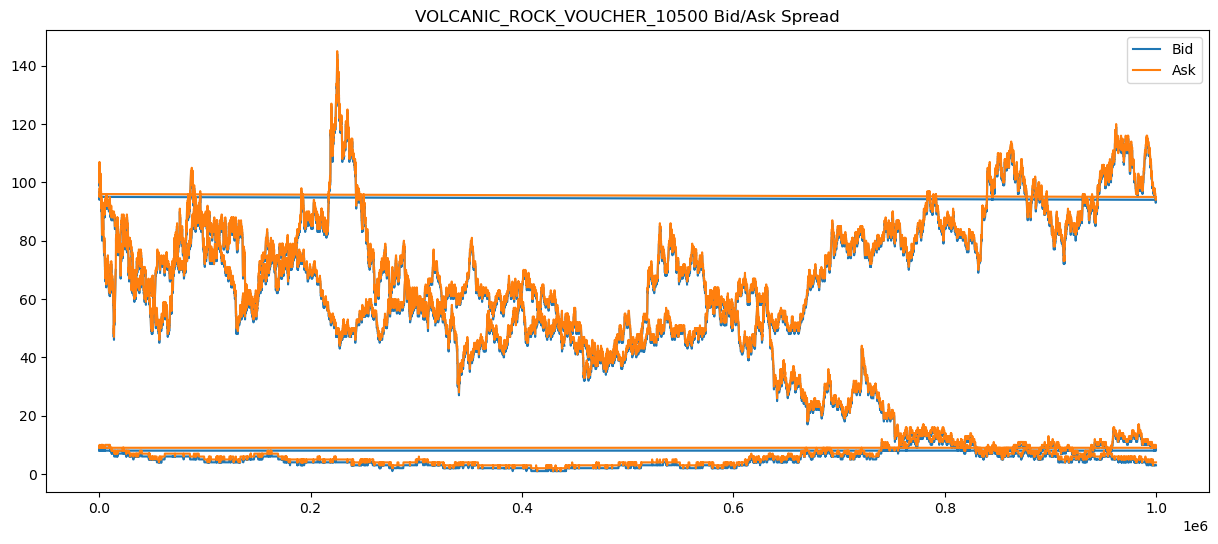

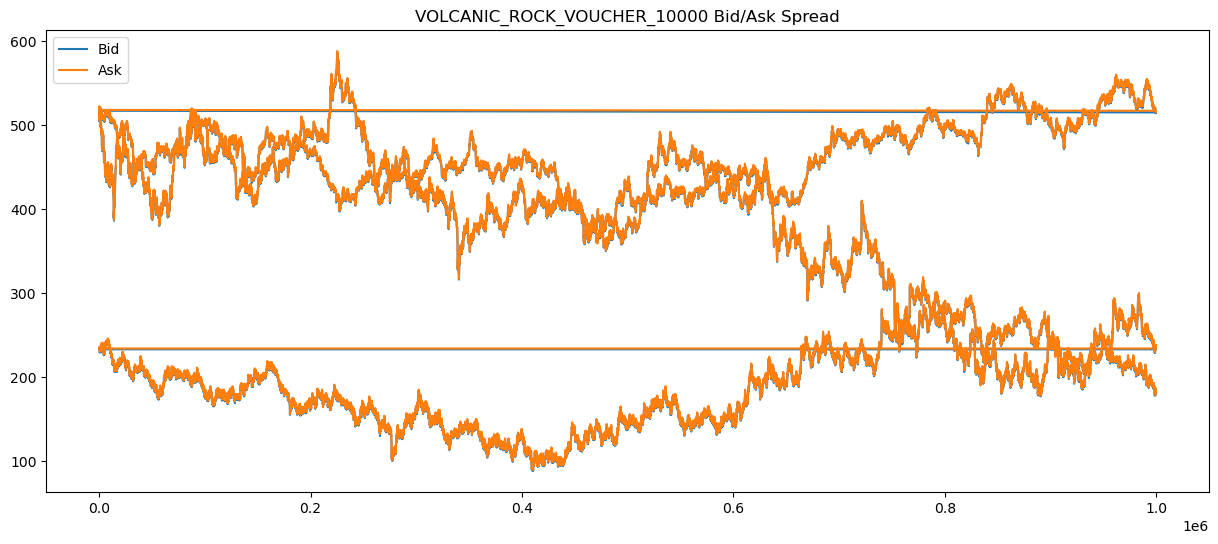

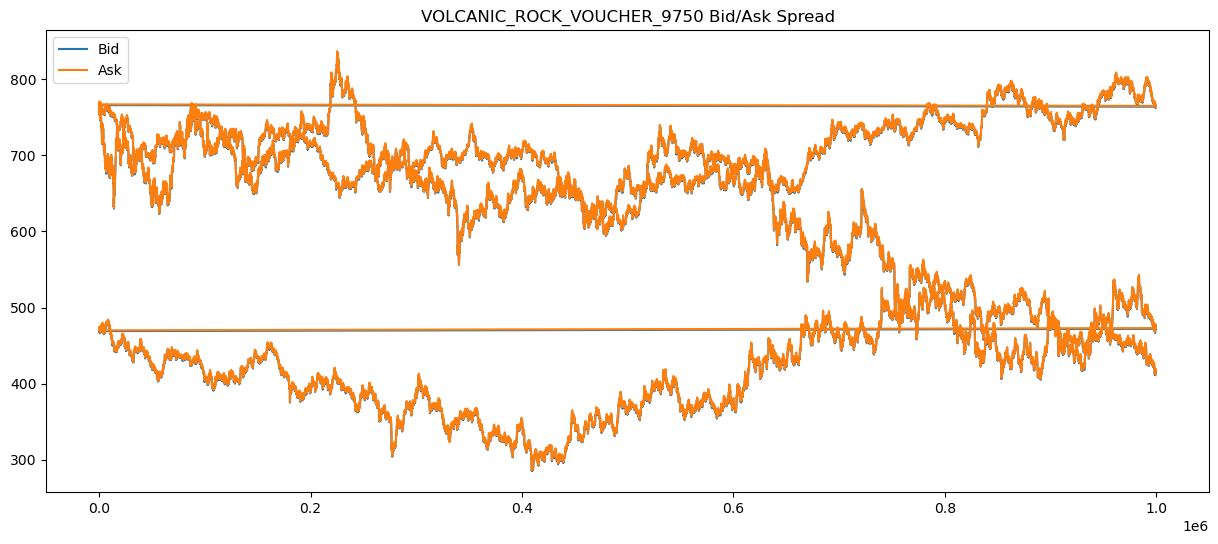

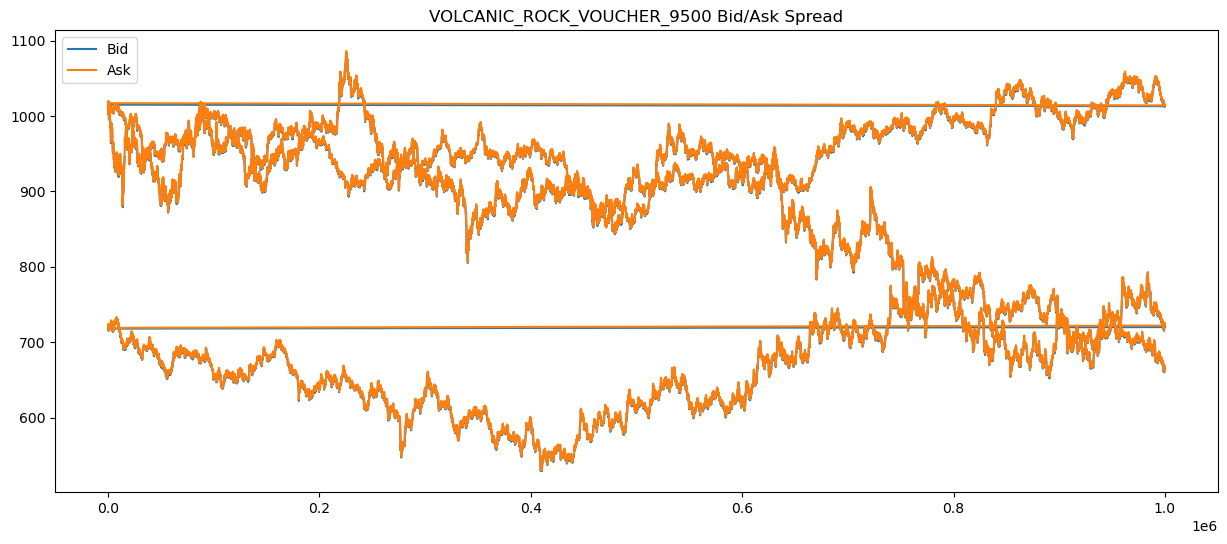

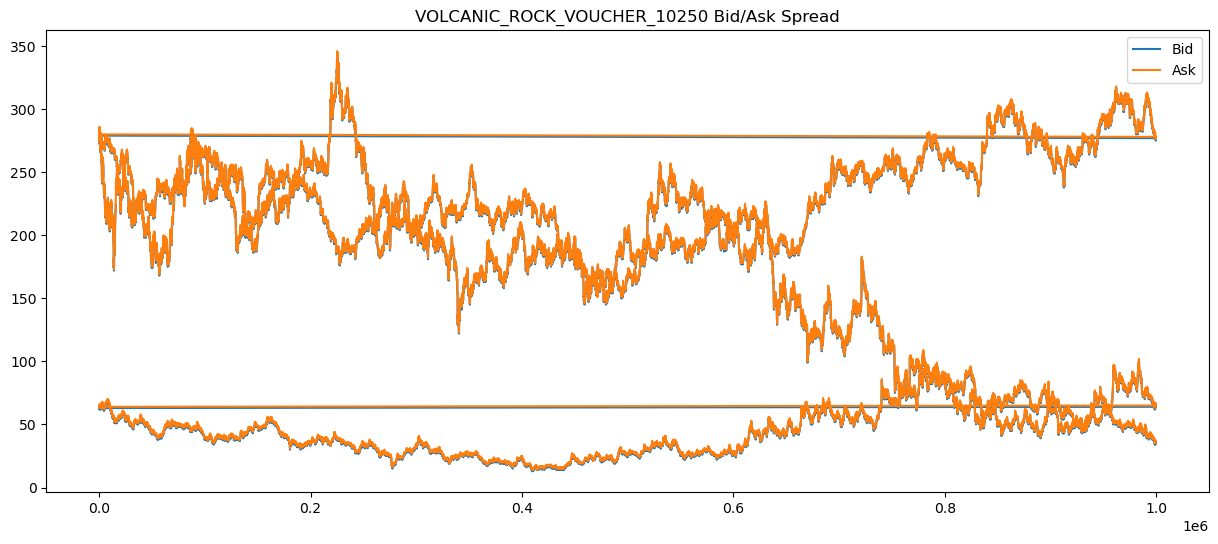

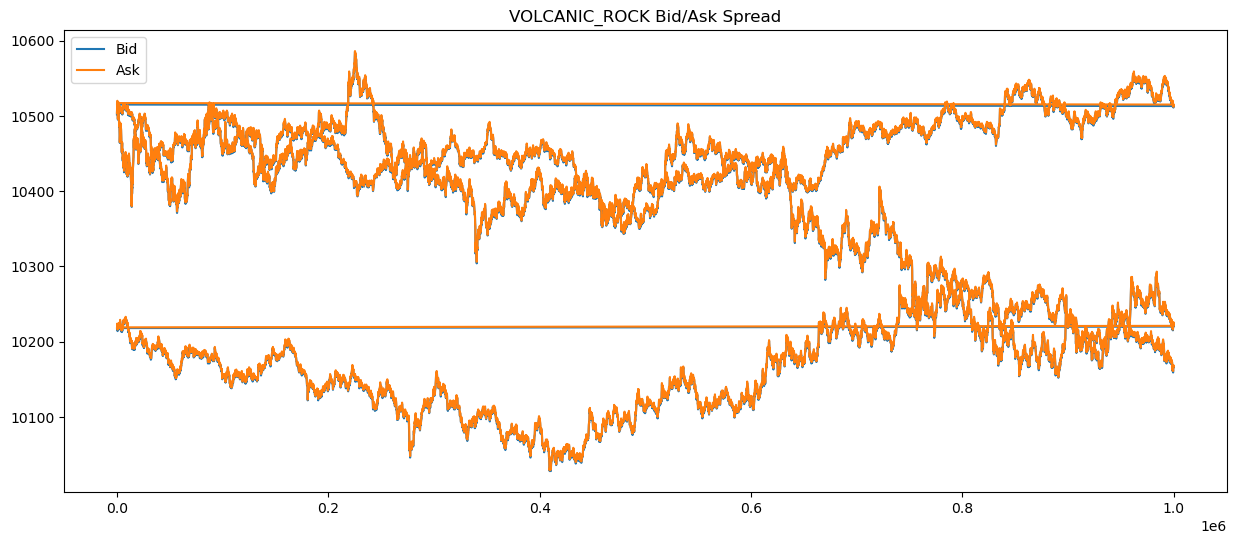

In [9]:
for rock in volcanic_df['product'].unique():
    rock_df = volcanic_df[volcanic_df['product'] == rock]
    
    plt.figure(figsize=(15,6))
    plt.plot(rock_df['timestamp'], rock_df['bid_price_1'], label='Bid')
    plt.plot(rock_df['timestamp'], rock_df['ask_price_1'], label='Ask')
    plt.fill_between(rock_df['timestamp'], rock_df['bid_price_1'], rock_df['ask_price_1'], alpha=0.2)
    plt.title(f'{rock} Bid/Ask Spread')
    plt.legend()
    plt.show()


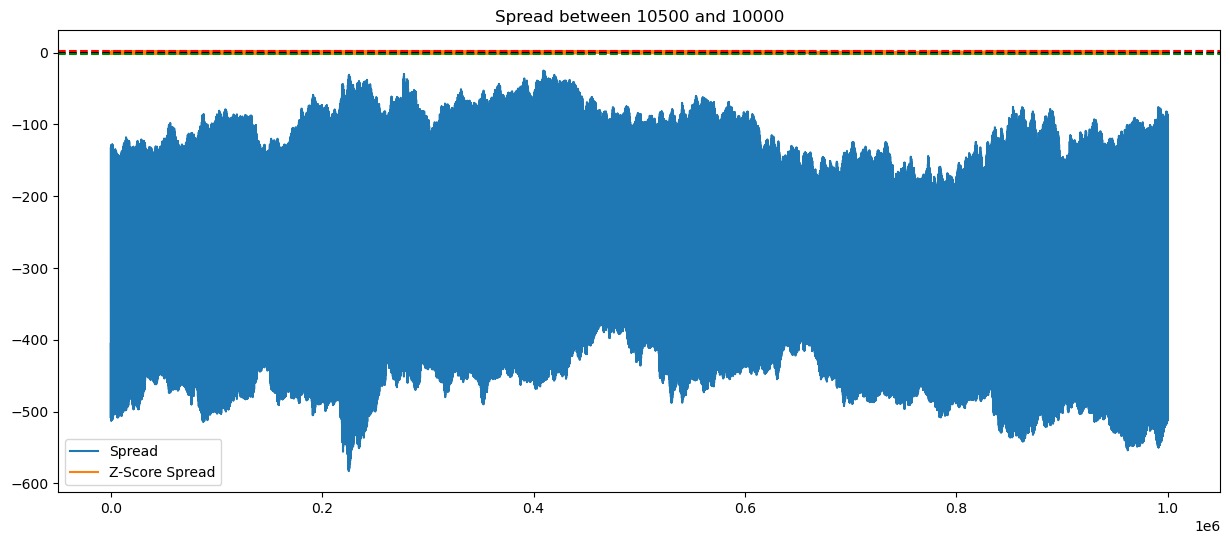

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

p1 = 'VOLCANIC_ROCK_VOUCHER_10500'
p2 = 'VOLCANIC_ROCK_VOUCHER_10000'

p1_df = volcanic_df[volcanic_df['product'] == p1].reset_index(drop=True)
p2_df = volcanic_df[volcanic_df['product'] == p2].reset_index(drop=True)

# Merge on timestamp (assuming same timestamps)
merged = pd.merge(p1_df, p2_df, on='timestamp', suffixes=('_10500', '_10000'))

merged['spread'] = merged['mid_price_10500'] - merged['mid_price_10000']
merged['spread_z'] = zscore(merged['spread'])

plt.figure(figsize=(15,6))
plt.plot(merged['timestamp'], merged['spread'], label='Spread')
plt.plot(merged['timestamp'], merged['spread_z'], label='Z-Score Spread')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(2, color='red', linestyle='--')
plt.axhline(-2, color='green', linestyle='--')
plt.legend()
plt.title('Spread between 10500 and 10000')
plt.show()


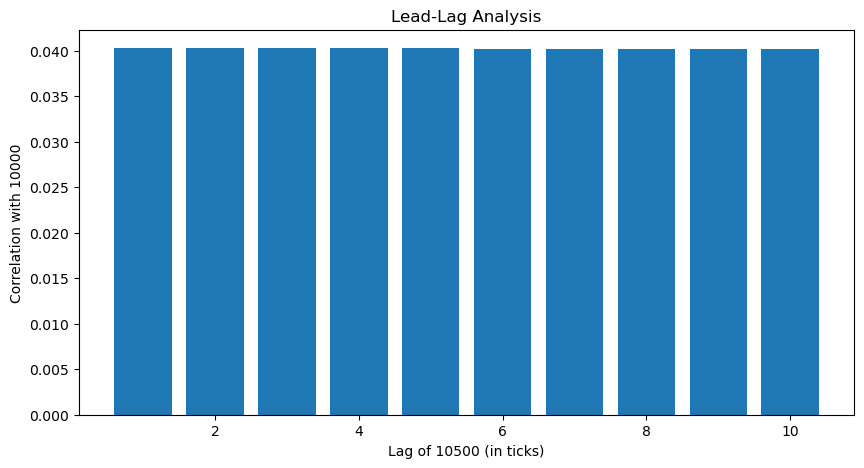

In [12]:
# Lag correlation
max_lag = 10
correlations = []

for lag in range(1, max_lag+1):
    shifted = merged['mid_price_10500'].shift(lag)
    corr = shifted.corr(merged['mid_price_10000'])
    correlations.append(corr)

plt.figure(figsize=(10,5))
plt.bar(range(1, max_lag+1), correlations)
plt.xlabel('Lag of 10500 (in ticks)')
plt.ylabel('Correlation with 10000')
plt.title('Lead-Lag Analysis')
plt.show()


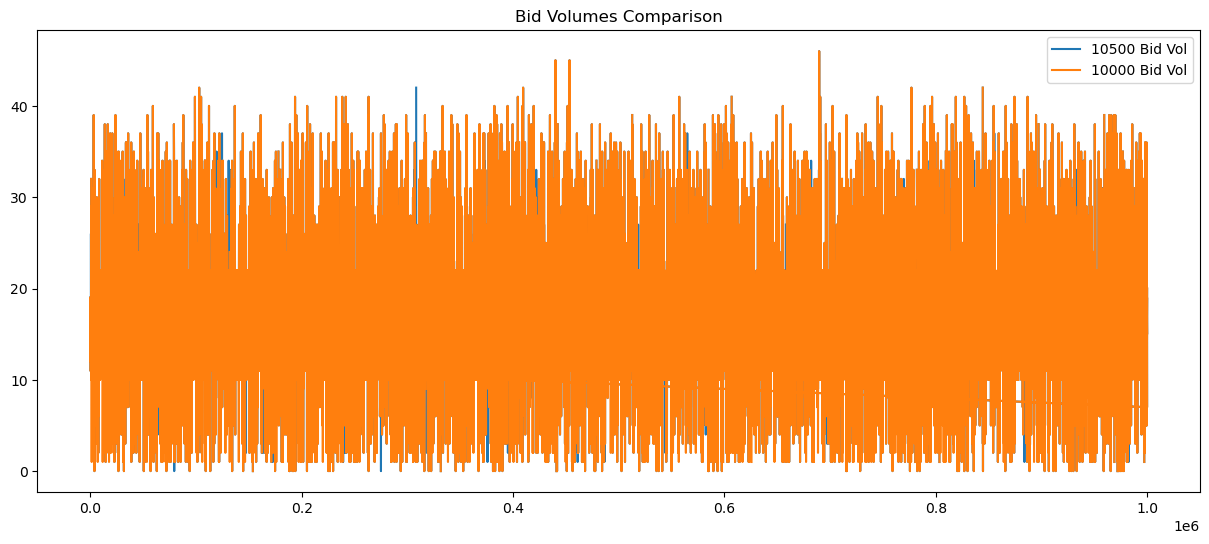

In [13]:
plt.figure(figsize=(15,6))
plt.plot(p1_df['timestamp'], p1_df['bid_volume_1'], label='10500 Bid Vol')
plt.plot(p2_df['timestamp'], p2_df['bid_volume_1'], label='10000 Bid Vol')
plt.legend()
plt.title('Bid Volumes Comparison')
plt.show()


In [14]:
vols = {}
for rock in volcanic_df['product'].unique():
    temp = volcanic_df[volcanic_df['product'] == rock]
    vols[rock] = temp['mid_price'].pct_change().std()

vol_df = pd.DataFrame.from_dict(vols, orient='index', columns=['Volatility'])
print(vol_df.sort_values('Volatility', ascending=False))


                             Volatility
VOLCANIC_ROCK_VOUCHER_10500    0.046418
VOLCANIC_ROCK_VOUCHER_10250    0.016157
VOLCANIC_ROCK_VOUCHER_10000    0.012981
VOLCANIC_ROCK_VOUCHER_9750     0.004898
VOLCANIC_ROCK_VOUCHER_9500     0.003243
VOLCANIC_ROCK                  0.000250


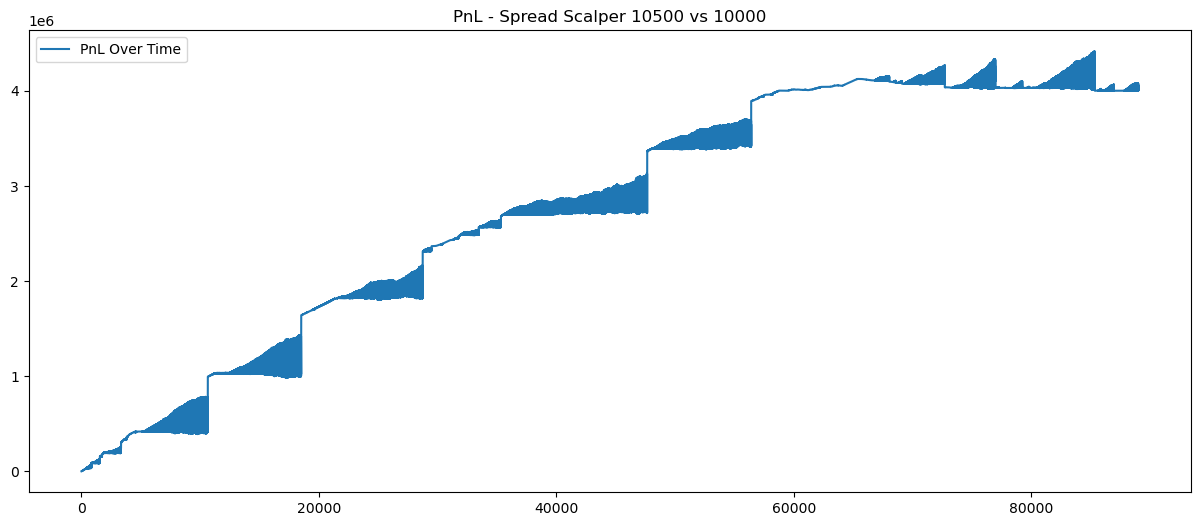

,inv_10500,inv_10000,cash,total_pnl
88995,177,-177,4094872.0,4001770.0
88996,177,-177,4094872.0,4051772.5
88997,177,-177,4094872.0,4060180.0
88998,177,-177,4094872.0,4000708.0
88999,177,-177,4094872.0,4050710.5


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your full df
# df = pd.read_csv("your_data.csv")

# Filter relevant products
p1 = 'VOLCANIC_ROCK_VOUCHER_10500'
p2 = 'VOLCANIC_ROCK_VOUCHER_10000'

p1_df = df[df['product'] == p1][['timestamp', 'mid_price']].rename(columns={'mid_price': 'mid_10500'})
p2_df = df[df['product'] == p2][['timestamp', 'mid_price']].rename(columns={'mid_price': 'mid_10000'})

# Merge on timestamp
merged = pd.merge(p1_df, p2_df, on='timestamp').reset_index(drop=True)

# Parameters
window = 1000
entry_threshold = 1.5
exit_threshold = 0.2
position_size = 1

# Rolling mean and std
merged['spread'] = merged['mid_10500'] - merged['mid_10000']
merged['mean'] = merged['spread'].rolling(window=window, min_periods=1).mean()
merged['std'] = merged['spread'].rolling(window=window, min_periods=1).std()

positions = []
cash = 0
inv_10500 = 0
inv_10000 = 0

# Strategy Logic
for i in range(window, len(merged)):
    spread = merged.loc[i, 'spread']
    mean = merged.loc[i, 'mean']
    std = merged.loc[i, 'std']

    if spread > mean + entry_threshold * std:
        inv_10500 -= position_size
        inv_10000 += position_size
        cash += spread * position_size

    elif spread < mean - entry_threshold * std:
        inv_10500 += position_size
        inv_10000 -= position_size
        cash -= spread * position_size

    elif abs(spread - mean) < exit_threshold * std:
        cash += (inv_10500 - inv_10000) * spread
        inv_10500 = 0
        inv_10000 = 0

    positions.append((inv_10500, inv_10000, cash))

positions_df = pd.DataFrame(positions, columns=['inv_10500', 'inv_10000', 'cash'])

# Mark to Market
positions_df['total_pnl'] = positions_df['cash'] + positions_df['inv_10500'] * merged['mid_10500'] + positions_df['inv_10000'] * merged['mid_10000']

# Plot
plt.figure(figsize=(15, 6))
plt.plot(positions_df['total_pnl'], label='PnL Over Time')
plt.title('PnL - Spread Scalper 10500 vs 10000')
plt.legend()
plt.show()

# Final output
positions_df.tail()


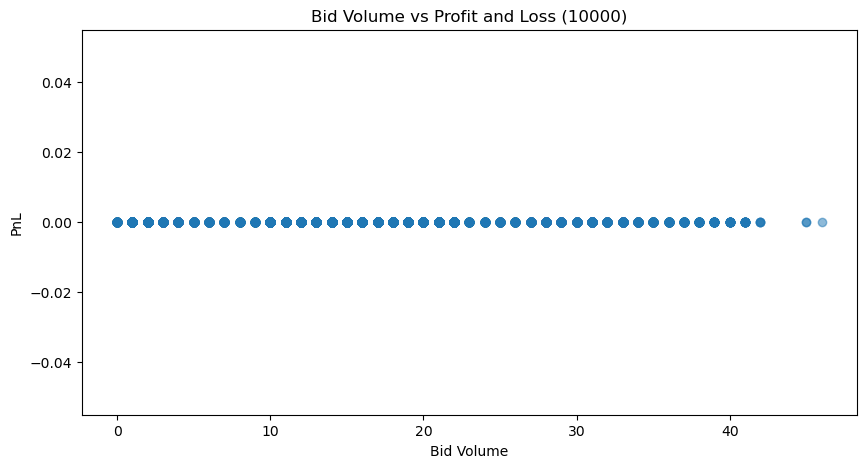

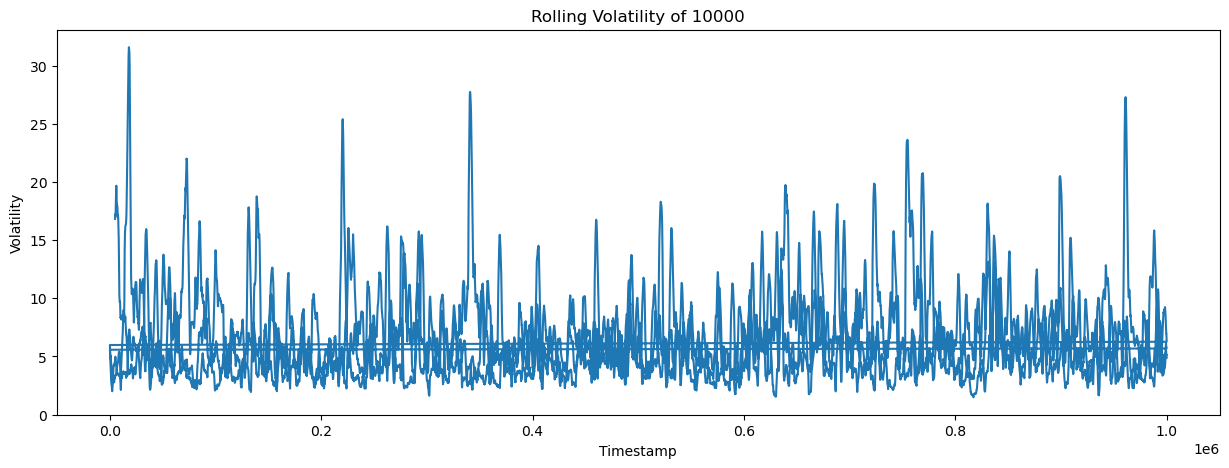

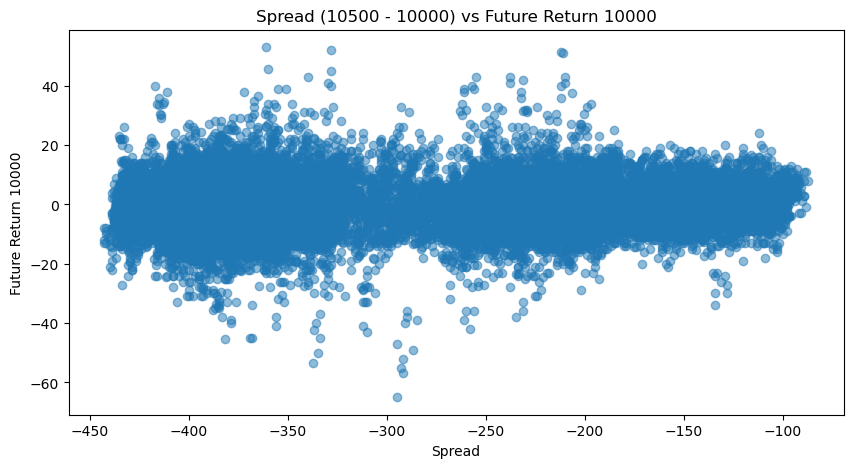

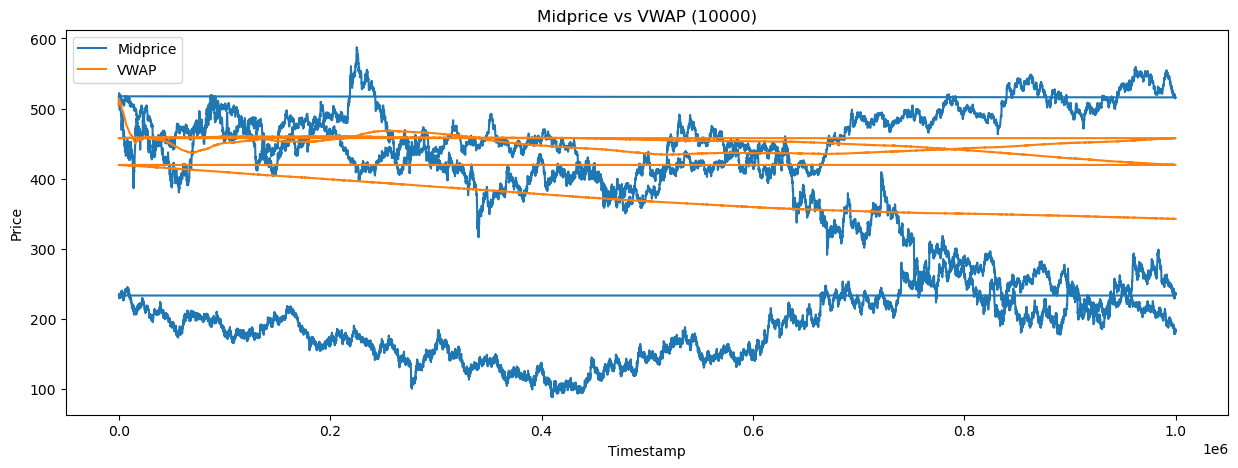

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulated structure based on your df layout
# You would replace this with: df = pd.read_csv("your_file.csv")
# And ensure it's filtered to just the products of interest (e.g., 10000 and 10500)

# Let's simulate a minimal structure to generate plots


# Split by product
df_10500 = df[df['product'] == 'VOLCANIC_ROCK_VOUCHER_10500'].reset_index(drop=True)
df_10000 = df[df['product'] == 'VOLCANIC_ROCK_VOUCHER_10000'].reset_index(drop=True)

# Create spread and future return (aligned by index for simplicity)
spread = df_10500['mid_price'].values[:len(df_10000)] - df_10000['mid_price'].values[:len(df_10000)]
future_return_10000 = df_10000['mid_price'].shift(-10) - df_10000['mid_price']

# 1. Volatility of 10000 mid price
rolling_vol = df_10000['mid_price'].rolling(window=50).std()

# 2. Position vs PnL is not available, but let's use bid_volume as a proxy for position
plt.figure(figsize=(10, 5))
plt.scatter(df_10000['bid_volume_1'], df_10000['profit_and_loss'], alpha=0.5)
plt.title('Bid Volume vs Profit and Loss (10000)')
plt.xlabel('Bid Volume')
plt.ylabel('PnL')
plt.show()

# 3. Rolling volatility over time
plt.figure(figsize=(15, 5))
plt.plot(df_10000['timestamp'], rolling_vol)
plt.title('Rolling Volatility of 10000')
plt.xlabel('Timestamp')
plt.ylabel('Volatility')
plt.show()

# 4. Spread vs future return
plt.figure(figsize=(10, 5))
plt.scatter(spread, future_return_10000[:len(spread)], alpha=0.5)
plt.title('Spread (10500 - 10000) vs Future Return 10000')
plt.xlabel('Spread')
plt.ylabel('Future Return 10000')
plt.show()

# 5. VWAP approximation vs midprice
vwap = (df_10000['mid_price'] * df_10000['bid_volume_1']).cumsum() / df_10000['bid_volume_1'].cumsum()
plt.figure(figsize=(15, 5))
plt.plot(df_10000['timestamp'], df_10000['mid_price'], label='Midprice')
plt.plot(df_10000['timestamp'], vwap, label='VWAP')
plt.legend()
plt.title('Midprice vs VWAP (10000)')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.show()


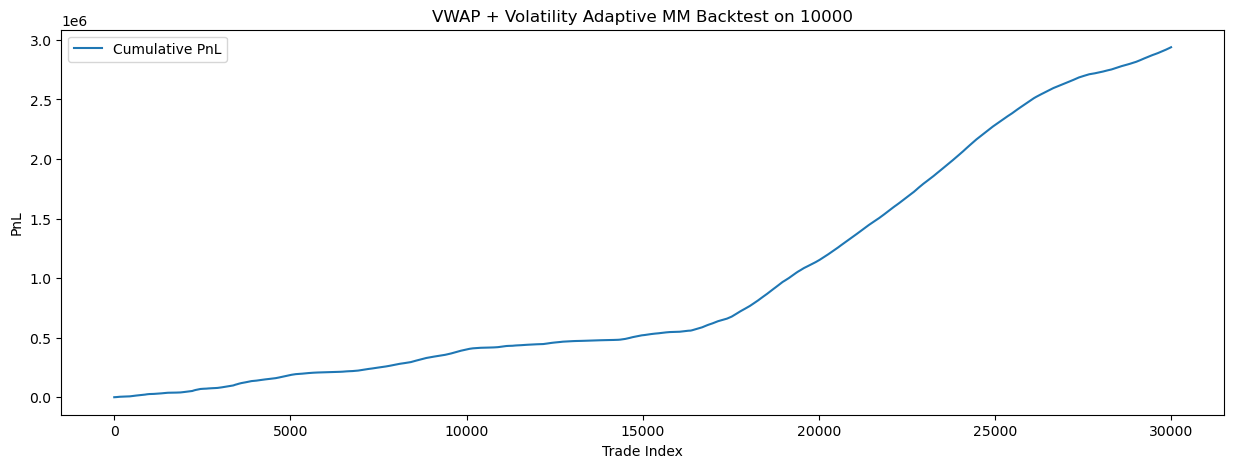

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your real data


# Filter only for 10000 product
df_10000 = df[df['product'] == 'VOLCANIC_ROCK_VOUCHER_10000'].reset_index(drop=True)

# VWAP calculation
df_10000['vwap'] = (df_10000['mid_price'] * df_10000['bid_volume_1']).cumsum() / df_10000['bid_volume_1'].cumsum()

# Volatility calculation (Rolling window)
df_10000['volatility'] = df_10000['mid_price'].rolling(window=100).std().fillna(0)

# Parameters for Strategy
tight_spread = 1  # tight MM spread in calm market
wide_spread = 3   # wider MM spread in volatile market
vol_threshold = df_10000['volatility'].median()  # adaptive threshold

# Initialize results
pnl = []
position = 0

for idx, row in df_10000.iterrows():
    vwap = row['vwap']
    mid = row['mid_price']
    vol = row['volatility']

    # Determine spread based on vol regime
    spread = tight_spread if vol < vol_threshold else wide_spread

    bid = vwap - spread / 2
    ask = vwap + spread / 2

    # Execution logic
    if mid < bid:
        position += 1
        pnl.append(-(mid - bid))  # buy lower than bid

    elif mid > ask:
        position -= 1
        pnl.append(-(ask - mid))  # sell higher than ask

    else:
        pnl.append(0)

# Convert PnL to cumulative sum
cumulative_pnl = np.cumsum(pnl)

plt.figure(figsize=(15, 5))
plt.plot(cumulative_pnl, label='Cumulative PnL')
plt.title('VWAP + Volatility Adaptive MM Backtest on 10000')
plt.xlabel('Trade Index')
plt.ylabel('PnL')
plt.legend()
plt.show()


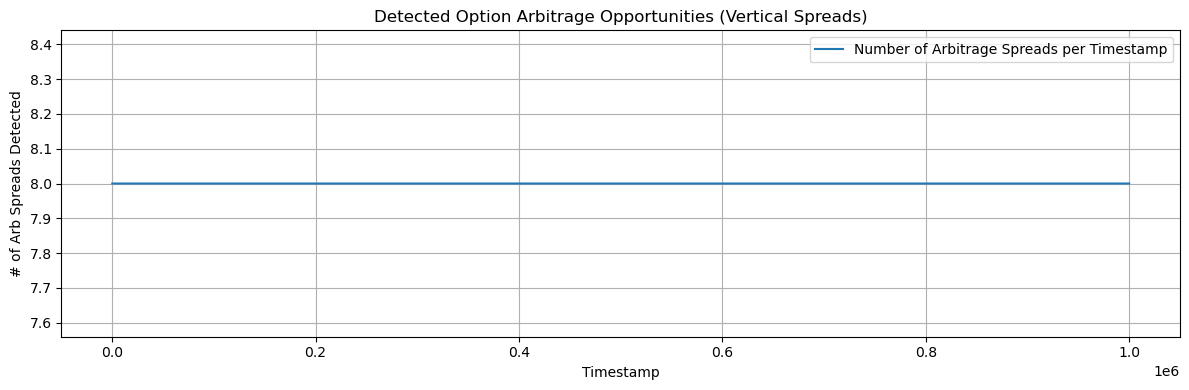

In [20]:
import pandas as pd


# Filter only volcanic-related products
volcanic_products = [
    "VOLCANIC_ROCK",
    "VOLCANIC_ROCK_VOUCHER_9500",
    "VOLCANIC_ROCK_VOUCHER_9750",
    "VOLCANIC_ROCK_VOUCHER_10000",
    "VOLCANIC_ROCK_VOUCHER_10250",
    "VOLCANIC_ROCK_VOUCHER_10500"
]
df = df[df['product'].isin(volcanic_products)].copy()

# Create pivot table of bid/ask prices by timestamp and product
pivot = df.pivot_table(index='timestamp', columns='product', values=['bid_price_1', 'ask_price_1', 'mid_price'])

# Calculate vertical spreads (e.g., 9500-9750, 9750-10000, etc.)
spread_df = pd.DataFrame(index=pivot.index)

# Add all option spreads
strikes = [9500, 9750, 10000, 10250, 10500]
for lower, upper in zip(strikes[:-1], strikes[1:]):
    bid_spread = pivot[('bid_price_1', f'VOLCANIC_ROCK_VOUCHER_{lower}')] - pivot[('ask_price_1', f'VOLCANIC_ROCK_VOUCHER_{upper}')]
    ask_spread = pivot[('ask_price_1', f'VOLCANIC_ROCK_VOUCHER_{lower}')] - pivot[('bid_price_1', f'VOLCANIC_ROCK_VOUCHER_{upper}')]
    spread_df[f'spread_{lower}_{upper}_bid'] = bid_spread
    spread_df[f'spread_{lower}_{upper}_ask'] = ask_spread

# Identify any clear arbitrage: bid spread > 0 or ask spread < 0 (which should not happen)
arb_opportunities = (spread_df > 0).sum(axis=1)

spread_df['arb_opportunities'] = arb_opportunities

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(spread_df['arb_opportunities'], label='Number of Arbitrage Spreads per Timestamp')
plt.title('Detected Option Arbitrage Opportunities (Vertical Spreads)')
plt.xlabel('Timestamp')
plt.ylabel('# of Arb Spreads Detected')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


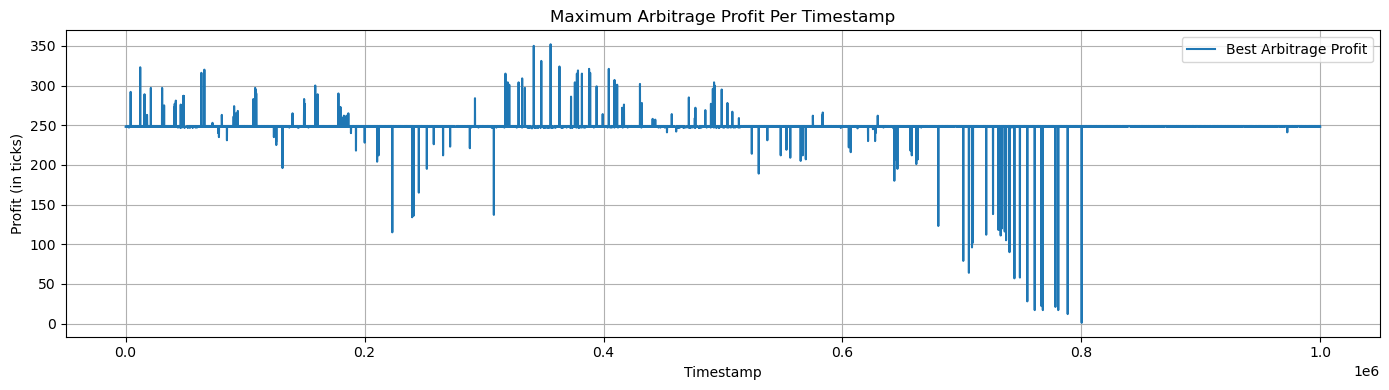


🔥 Top 10 Arbitrage Trades:
       timestamp      spread                action  expected_profit
14225     355700   9500-9750   Sell 9500, Buy 9750            352.0
13661     341600   9500-9750   Sell 9500, Buy 9750            350.0
14226     355700  9750-10000  Sell 9750, Buy 10000            346.0
13662     341600  9750-10000  Sell 9750, Buy 10000            342.0
13913     347900   9500-9750   Sell 9500, Buy 9750            331.0
13914     347900  9750-10000  Sell 9750, Buy 10000            325.0
14521     363100   9500-9750   Sell 9500, Buy 9750            324.0
488        12200   9500-9750   Sell 9500, Buy 9750            323.0
16173     404400   9500-9750   Sell 9500, Buy 9750            321.0
15513     387900   9500-9750   Sell 9500, Buy 9750            321.0


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV


# Only relevant products
vouchers = [9500, 9750, 10000, 10250, 10500]
product_map = {f"VOLCANIC_ROCK_VOUCHER_{s}": s for s in vouchers}
df = df[df['product'].isin(product_map.keys())]

# Pivot bid/ask per timestamp
pivot_bid = df.pivot_table(index='timestamp', columns='product', values='bid_price_1', aggfunc='first')
pivot_ask = df.pivot_table(index='timestamp', columns='product', values='ask_price_1', aggfunc='first')


# Store trade instructions and profit potential
arb_records = []

for t in pivot_bid.index:
    row_bid = pivot_bid.loc[t]
    row_ask = pivot_ask.loc[t]

    for i in range(len(vouchers)-1):
        low = vouchers[i]
        high = vouchers[i+1]

        p_low = f"VOLCANIC_ROCK_VOUCHER_{low}"
        p_high = f"VOLCANIC_ROCK_VOUCHER_{high}"

        if pd.notna(row_bid[p_low]) and pd.notna(row_ask[p_high]):
            spread_bid = row_bid[p_low] - row_ask[p_high]
            if spread_bid > 0:
                arb_records.append({
                    'timestamp': t,
                    'spread': f"{low}-{high}",
                    'action': f"Sell {low}, Buy {high}",
                    'expected_profit': spread_bid
                })

        if pd.notna(row_ask[p_low]) and pd.notna(row_bid[p_high]):
            spread_bid = row_bid[p_high] - row_ask[p_low]
            if spread_bid > 0:
                arb_records.append({
                    'timestamp': t,
                    'spread': f"{high}-{low}",
                    'action': f"Sell {high}, Buy {low}",
                    'expected_profit': spread_bid
                })

# Make into DataFrame
arb_df = pd.DataFrame(arb_records)

# Plot best arb profit per timestamp
best_spread_by_time = arb_df.groupby('timestamp')['expected_profit'].max()

plt.figure(figsize=(14, 4))
plt.plot(best_spread_by_time, label='Best Arbitrage Profit')
plt.title('Maximum Arbitrage Profit Per Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Profit (in ticks)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Show top 10 profitable arbs
print("\n🔥 Top 10 Arbitrage Trades:")
print(arb_df.sort_values('expected_profit', ascending=False).head(10))


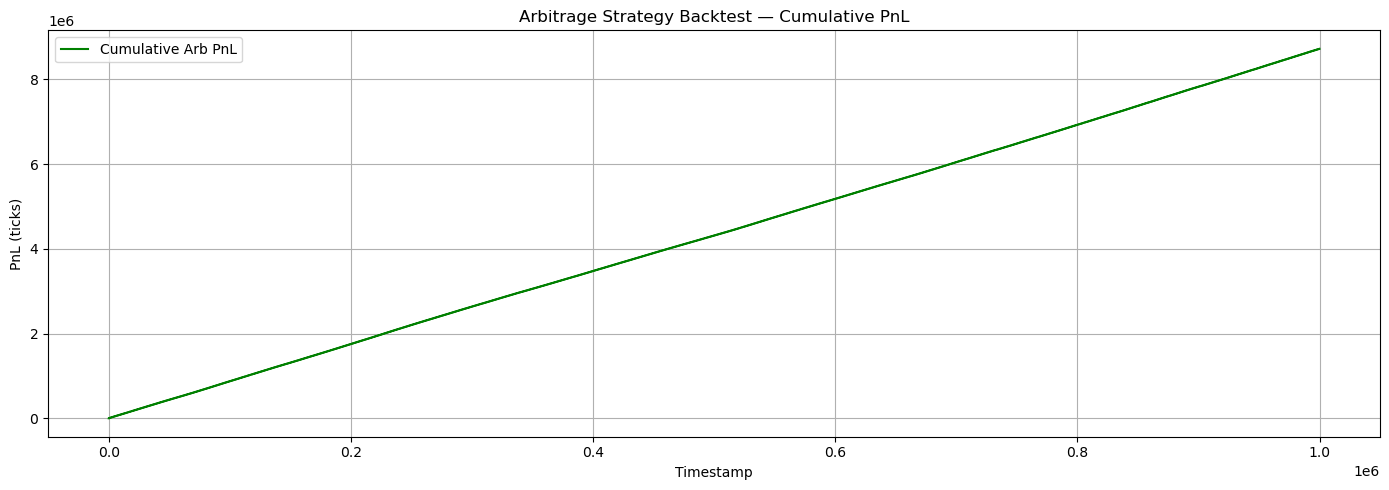

Total Trades: 39822
Total PnL (ticks): 8720317.00
Average Profit per Trade: 218.98
Median Profit per Trade: 240.00

Top Spread Frequency:
9500-9750      9959
9750-10000     9956
10000-10250    9954
10250-10500    9953
Name: spread, dtype: int64


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Use your arb_df from before (already detected opportunities)

# Backtest Results Storage
arb_df = arb_df.sort_values('timestamp')

# Simulate PnL per trade (buy at ask, sell at bid)
arb_df['pnl_per_trade'] = arb_df['expected_profit']  # Already best case spread

# Cumulative PnL over time
arb_df['cumulative_pnl'] = arb_df['pnl_per_trade'].cumsum()

# Plot Cumulative PnL
plt.figure(figsize=(14, 5))
plt.plot(arb_df['timestamp'], arb_df['cumulative_pnl'], label='Cumulative Arb PnL', color='green')
plt.title('Arbitrage Strategy Backtest — Cumulative PnL')
plt.xlabel('Timestamp')
plt.ylabel('PnL (ticks)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Quick Stats
print(f'Total Trades: {len(arb_df)}')
print(f'Total PnL (ticks): {arb_df["cumulative_pnl"].iloc[-1]:.2f}')
print(f'Average Profit per Trade: {arb_df["pnl_per_trade"].mean():.2f}')
print(f'Median Profit per Trade: {arb_df["pnl_per_trade"].median():.2f}')

# Optional: Check Pairs Most Profitable
print('\nTop Spread Frequency:')
print(arb_df['spread'].value_counts().head(5))
